Import relevant libraries & use uproot to open it.

In [1]:
import uproot
import pandas
import matplotlib.pyplot as plt
import numpy as np

tree = uproot.open("outRunNeutron.root")["dstree"]

# Opening and preparing the data


The different variables contained within the tree.

In [2]:
tree.show()

ev                         (no streamer)              asdtype('>i4')
pdg                        (no streamer)              asdtype('>i4')
ene0                       (no streamer)              asdtype('>f4')
s1ene                      (no streamer)              asdtype('>f4')
s2ene                      (no streamer)              asdtype('>f4')
veto_visene                (no streamer)              asdtype('>f4')
mu_visene                  (no streamer)              asdtype('>f4')
tpcene                     (no streamer)              asdtype('>f4')
vetoene                    (no streamer)              asdtype('>f4')
muene                      (no streamer)              asdtype('>f4')
ene                        (no streamer)              asdtype('>f4')
x                          (no streamer)              asdtype('>f4')
y                          (no streamer)              asdtype('>f4')
z                          (no streamer)              asdtype('>f4')
r                          (no str

## Getting the x and y variables

From the list of variables stored in the root file, we can extract the relevant variables we would like to use to create a 2D histogram. Some of these variables may require further manipulation, and this is also done here.

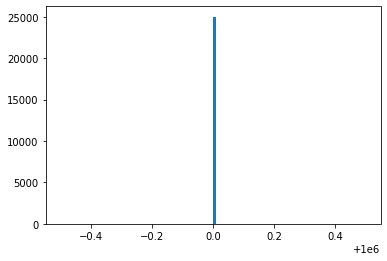

In [3]:
ene0 = tree.array("ene0")
vetoene = tree.array("vetoene")
x = tree.array("dep_x")
y = tree.array("dep_y")
#x.flatten()

ene0_veto = []
pos = []
for i in range(len(x)):
    for j in range(len(x[i])):
        ene0_veto.append((ene0[i]/(vetoene[i]+ 0.01)))
        pos.append(np.sqrt((x[i][j]*x[i][j])+(y[i][j]*y[i][j])))

#for k in range(len(ene0)):
#    ene0_veto.append((ene0[k]/(vetoene[k]+ 0.01)))
#    pos.append(np.sqrt((x[k]*x[k])+(y[k]*y[k])))

#print(len(ene0_veto))
#print(len(pos))
a1 = np.array(ene0_veto)
a2 = np.array(pos)
train = np.matrix([a1,a2])
train = train.T
#print(x)
train = np.array(train)
plt.hist(ene0_veto, bins = 100)
#plt.hist(y, bins = 100)
#plt.hist2d(a1, a2, bins=100, cmap=plt.cm.BuPu, cmin = 1)
plt.show()
#print(train.shape)
#plt.hist(x, bins = 100)

Normalisation: 
Divide values by xdiv and div to get close to one

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
        0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
        0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
        0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
        0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
        1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
        1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
        1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
        1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
        1.49, 1.5 ]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0

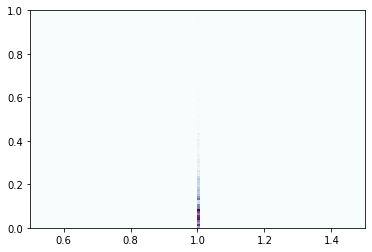

In [4]:
#saves the values we are dividing by.
a1max = np.amax(a1)
a2max = np.amax(a2)
#Normalises the values
a1 = a1/np.amax(a1)
a2 = a2/np.amax(a2)

train = np.matrix([a1,a2])
train = train.T

plt.hist2d(a1, a2, bins=100, cmap=plt.cm.BuPu)

Training Dataset is the x variable.

In [5]:
#  Model dependent constants
#  Define model PDF

#The range of the model
#x_range_min, x_range_max = 0, 300
#y_range_min, y_range_max = 0.5, 1.5
#The range being plot
#x_range_width = x_range_max - x_range_min
#y_range_width = y_range_max - y_range_min

In [6]:
num_train = int(1e3)
noise_size = 1000
epochs     = 10000
batch_size = 16

In [7]:
#  Create GAN

from keras.layers     import BatchNormalization, Dense, Dropout, Input, LeakyReLU
from keras.models     import Model, Sequential
from keras.optimizers import Adam

#Discriminator
#See how number of neurons are sae for each layer to reduce number of hyperparameters
d = Sequential(name="Discriminator")
d.add(Dense(50, activation="relu", input_shape=(2,)))
#Input shape would be number of parameters
d.add(Dense(50, activation="relu"))
d.add(Dense(50))
d.add(Dense(50, activation="relu"))
d.add(Dense(50))
d.add(LeakyReLU(0.2))
d.add(Dense(2, activation="softmax"))
d.compile(loss="categorical_crossentropy", optimizer=Adam(0.0002, beta_1=0.3), metrics=["accuracy"])
d.summary()

g = Sequential(name="Generator")
g.add(Dense(50, activation="relu", input_shape=(noise_size,)))
g.add(BatchNormalization())
g.add(Dense(50, activation="relu"))
g.add(BatchNormalization())
g.add(Dense(50, activation="relu"))
g.add(BatchNormalization())
#THe number of ourputs here should be the number of dimensions
g.add(Dense(2, activation="linear"))
g.summary()

input_layer = Input((noise_size,))
output_layer = d(g(input_layer))
gan = Model(input_layer, output_layer)
d.trainable = False
gan.compile(loss="categorical_crossentropy", optimizer=Adam(0.0002, beta_1=0.3), metrics=["accuracy"])
gan.summary()

Using TensorFlow backend.


AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

In [ ]:
#  Func: plot GAN progress

def plot_points_GAN (data, label, epoch, batch_size, d_acc, gan_acc) :
    
    #y = plt.hist(train_DS, alpha = 0.3,density = True, label = 'Real Data')
    #x = np.linspace(range_min, range_max, 200)
    #h = plt.hist2d(data, bins=np.linspace(range_min, range_max, 1+int(range_width/plot_resolution)), color="blue", alpha=0.6,density = True, label=label)
    #plt.legend(loc="upper right", fontsize=14)
    #plt.xlabel("x", size=14, labelpad=10)
    #y_max = 1.5*max([max(y),max(h[0])])
    #y_max = 0.08
    #plt.ylabel(r"$\rho\left(x\right)$", size=14, labelpad=30, rotation="horizontal")
    #plt.gca().set_xlim([range_min-0.1*range_width, range_max+0.1*range_width])
    '''plt.text(range_min+0.*1.1*range_width   , 0.84*y_max, "GAN test", size=18, style="italic", weight="bold")
    plt.text(range_min+0.750*1.1*range_width, 0.68*y_max, f"Epoch: {epoch}")
    plt.text(range_min+0.683*1.1*range_width, 0.61*y_max, f"Batch size: {batch_size}")
    plt.text(range_min+0.780*1.1*range_width, 0.54*y_max, r"$\epsilon_{\rm disc}$: "+f"{int(100.*d_acc)}%")
    plt.text(range_min+0.780*(range_max-range_min), 0.47*y_max, r"$\epsilon_{\rm GAN}$: "+f"{int(100.*gan_acc)}%")
    '''
    h = plt.imshow(data)
    plt.subplots_adjust(left=0.18, right=0.98, top=0.95, bottom=0.15)
    plt.savefig("Train_epoch{epoch}.png", dpi=96)
    plt.show()

In [ ]:
#  Train GAN

epochs     = 10000
batch_size = 16
max_D_itrs_per_G_itr_e70 = 4
max_D_itrs_per_G_itr_e52 = 3


def update_batch_size (gen_DS) :
    global batch_size
    batch_size = min(100+batch_size, num_train)
    
    epochs_saved = []

In [ ]:
def noisegenerator(batch_size, noise_size):
    return np.random.uniform(low = -1, high = 1, size=(batch_size, noise_size))

In [ ]:
import tensorflow as tf
epochs_saved = []
loss = []
epoch_no = []
for e in range(epochs) :
    noise  = noisegenerator(batch_size, noise_size)
    #Get the real and fake data
    #train = train.reshape(2,1000)
    batch_DS = train[np.random.choice(train.shape[0], batch_size, replace=False), :]
    #batch_DS = train[np.random.randint(0, len(train), batch_size)].reshape(batch_size, 2)
    #fake data made from predicting noise
    #print(batch_DS)
    gen_DS   = g.predict(noise).reshape(batch_size, 2)
    
    #Real data has label [1.,0]
    real_label = np.array([[1., 0.] for i in range(batch_size)])
    
    #Fake data has label [0.,1.]
    fake_label = np.array([[0., 1.] for i in range(batch_size)])
    
    #Combine real and generated data
    X = np.concatenate([batch_DS  , gen_DS    ])
    Y = np.concatenate([real_label, fake_label])
    
    d.trainable = True
    d_loss, d_acc = d.train_on_batch(X, Y)
    num_itr = 0
    while num_itr < max_D_itrs_per_G_itr_e70 and d_acc < 0.7 :
        d_loss, d_acc = d.train_on_batch(X, Y)
        num_itr = num_itr + 1
    while num_itr < max_D_itrs_per_G_itr_e52 and d_acc < 0.52 :
        d_loss, d_acc = d.train_on_batch(X, Y)
        num_itr = num_itr + 1
        
    noise  = noisegenerator(batch_size, noise_size)
    d.trainable = False
    gan.train_on_batch(noise, real_label)
    
    if e == 0 or (e+1) % 100 == 0 :
        noise  = noisegenerator(batch_size, noise_size)
        gen_DS = g.predict(noise)
        print(d.evaluate(X, Y, verbose=0)[1])
        epoch_no.append(e)
        loss.append(d.evaluate(X, Y, verbose=0)[1])
        #x, y = np.hsplit(gen_DS, 2)
        x = np.asarray(gen_DS)[:,0]
        y = np.asarray(gen_DS)[:,1]
        plt.hist2d(x*a1max, y*a2max, bins=100, cmap=plt.cm.BuPu)
        plt.show()
        """plot_points_GAN(gen_DS, f"Generated data", 
                    epoch=e+1, 
                    batch_size=batch_size, 
                    d_acc=d.evaluate(X, Y, verbose=0)[1], 
                    gan_acc=gan.evaluate(noise, real_label, verbose=0)[1])
                    """
        update_batch_size(gen_DS)
        epochs_saved.append(e+1)

In [ ]:
plt.plot(epoch_no,loss)